<h1 align="center"><u><font color ='maroon'>PRACTICE PROJECT-2</font></u></h1>
<h1 align="center"><u><font color='red'> World Happiness Index </font><u></h1>
<h2 align="center"> To Predict the Happiness Score of a country.

<h2><u><font color='green'>First - Step1:</font></u> Import Libraries.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

<h2><u><font color='green'>NEXT - Step2:</font></u>Read the CSV from the github URL.

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<h2><u><font color='green'>NEXT - Step3:</font></u> Rearranging columns for and dropping unnecessary columns.</h2>
<h4><br> Re-arranging columns to make it more easier to read.
    <br> Since Geographical location is not the basis in which the Happiness score is calculated, it is unnecessary and hence removed.
    <br> Country name is used as an identifier. it is not used for any operations.

In [6]:
ndf=df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,3]]
#ndf=new_df.drop(columns = ['Region'])

ndf

,Country,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


<h2><u><font color='green'>NEXT - Step4:</font></u>Checking the Type of each column.</h2>
    <br><h4>Ensuring the types are correct for the further transformations.

In [7]:
ndf.dtypes

Country                           object
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

<h2><u><font color='green'>NEXT - Step5:</font></u>Checking for Null values.

In [8]:
ndf.isnull().sum().sum()#-----------No null values

0

<h2><u><font color='green'>NEXT - Step7:</font></u> Outliers:</h2><br><h4>Although present, we are NOT removing the outliers as the information is unique to the country and hence the Happiness score.

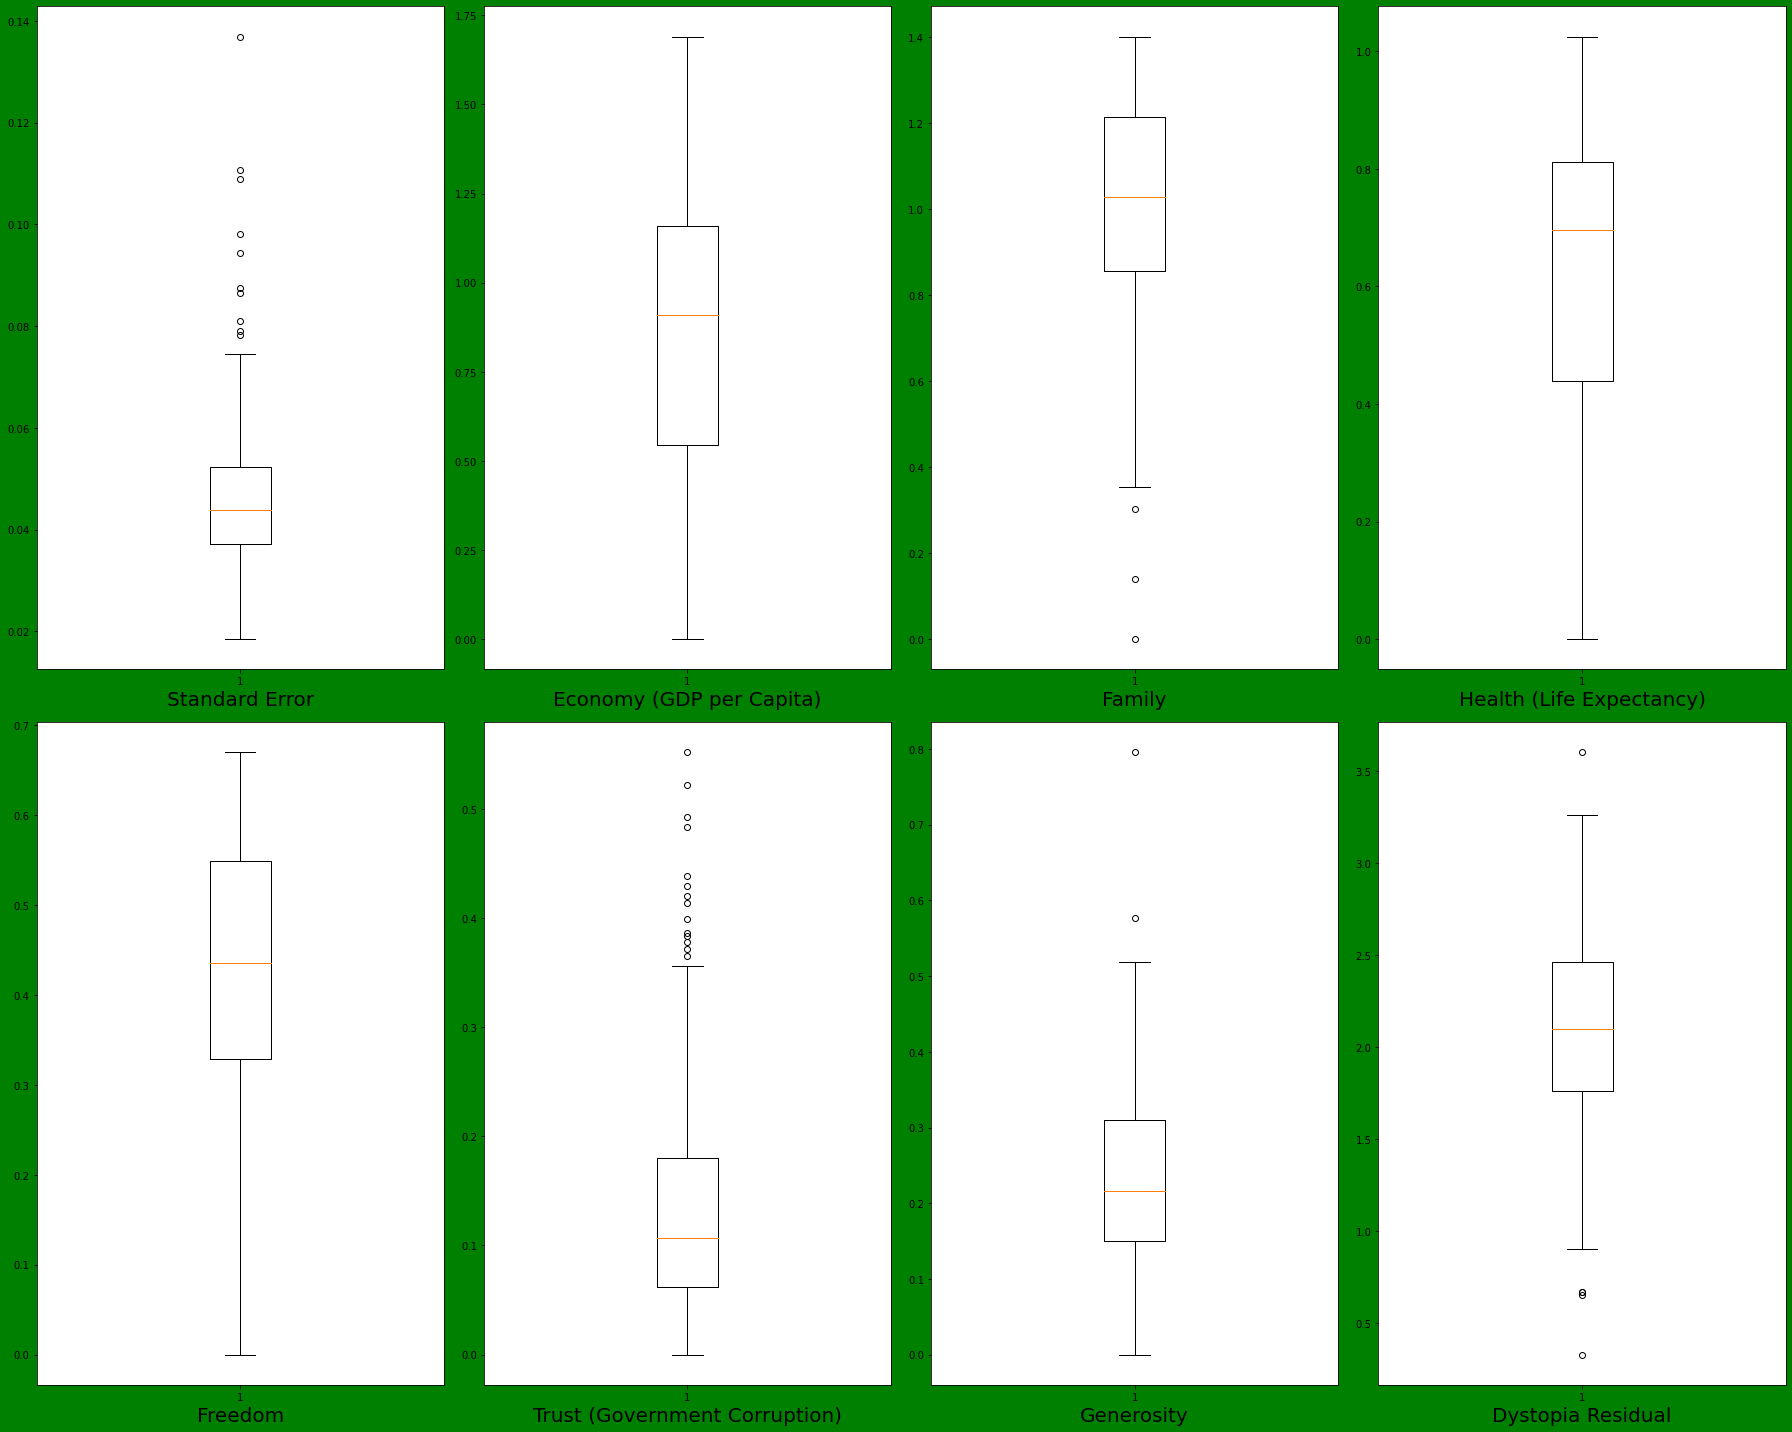

In [99]:
plt.figure(figsize=(25,20),facecolor='green')
plotnumber = 1

for column in ndf.drop(['Country','Happiness Rank','Happiness Score'], axis=1):
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.boxplot(ndf.drop(['Country','Happiness Rank'], axis=1)[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h2><u><font color='green'>NEXT - Step8:</font></u> Distribution:</h2><br><h4>Check to see if the Columns to be selected as features and label, are in Normal Distribution. <br>Which is also an important factor in determining if we need to use Linear Regression

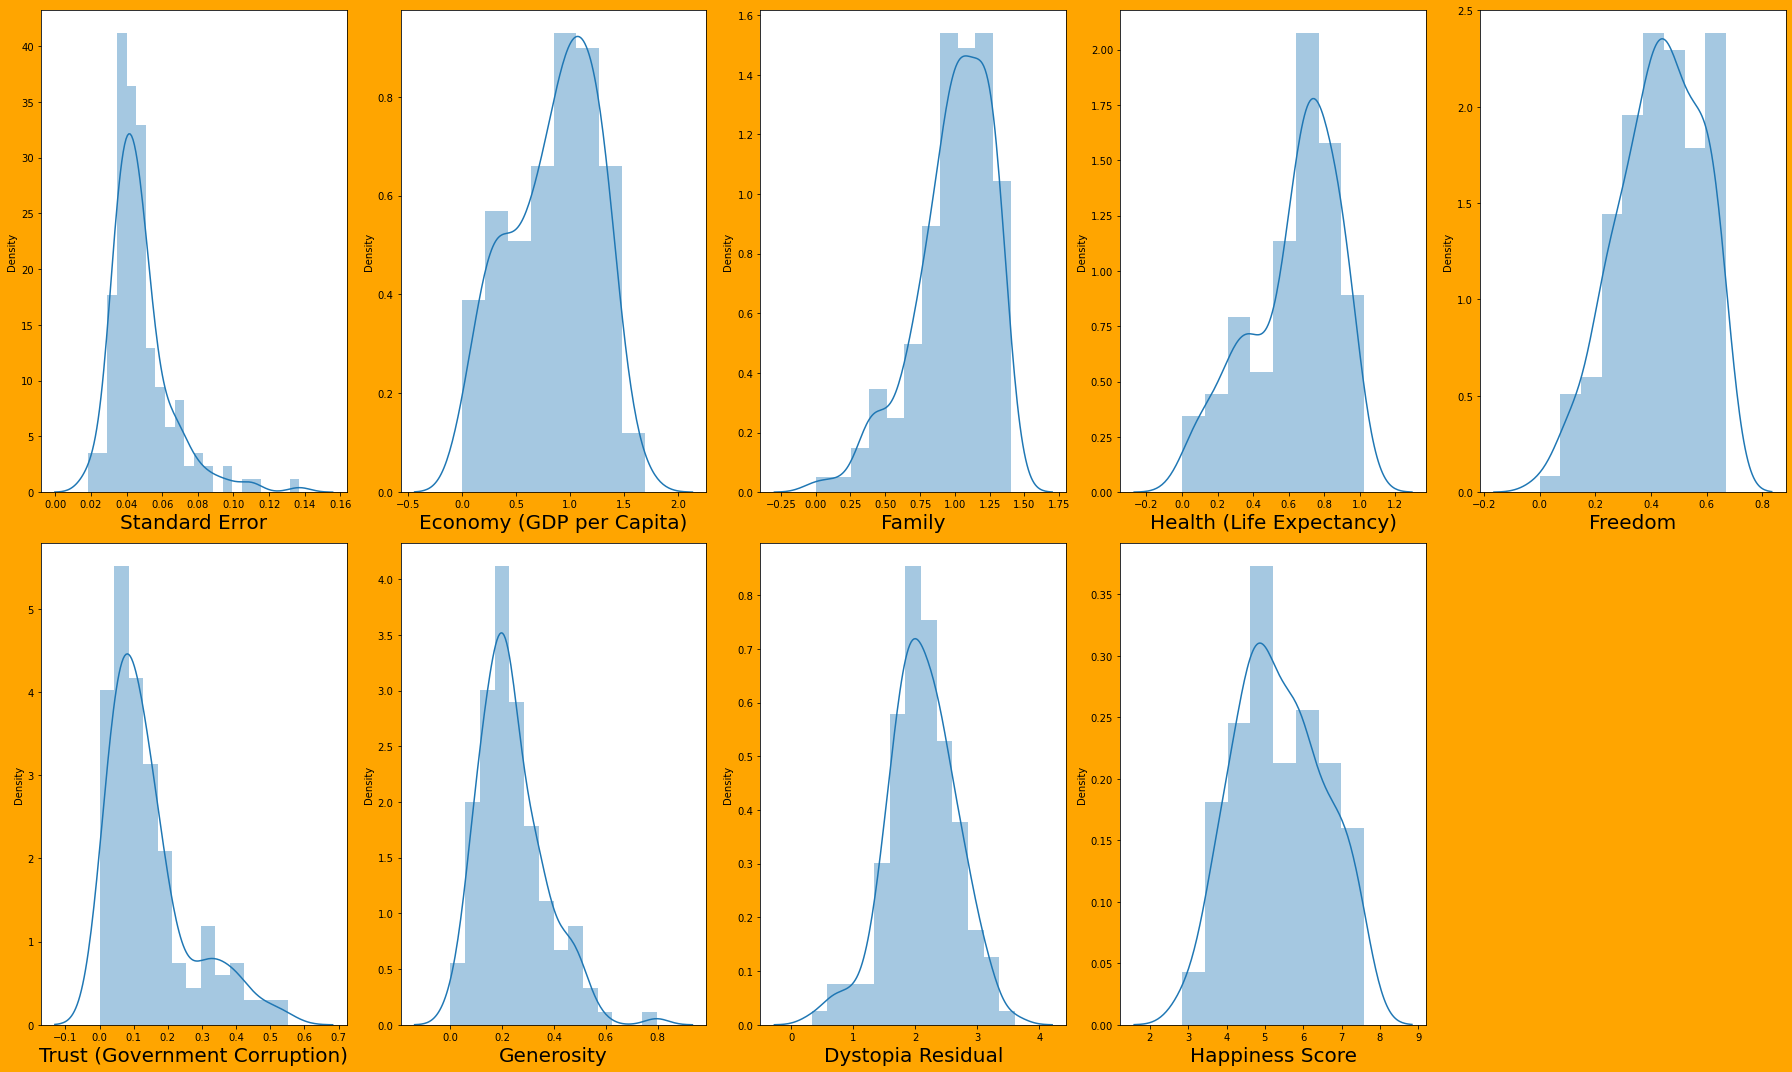

In [9]:
plt.figure(figsize=(25,15),facecolor='orange')
plotnumber = 1

for column in ndf.drop(['Country','Happiness Rank'], axis=1):
    if plotnumber<=10:
        ax = plt.subplot(2,5,plotnumber)
        sns.distplot(ndf.drop(['Country','Happiness Rank'], axis=1)[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h4> All Features and label are normally distributed.

<h2><u><font color='green'>NEXT - Step9:</font></u></h2><h3> Dividing columns as features and label</h3><br>
<h4> For Features: removing Happiness rank, happiness score.<br>
    For Label: using Happiness score.<br> Since country name is an abject and not a value to be considered for correlation, removing the same.  

In [69]:
#divide the data into Feature and label

y= ndf['Happiness Score']

x=ndf.drop(columns = ['Happiness Score','Country','Happiness Rank'])
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<<h2><u><font color='green'>NEXT - Step10:</font></u> Checking feature vs label plot</h2><br><h4> using Scatter plot from matplotlib

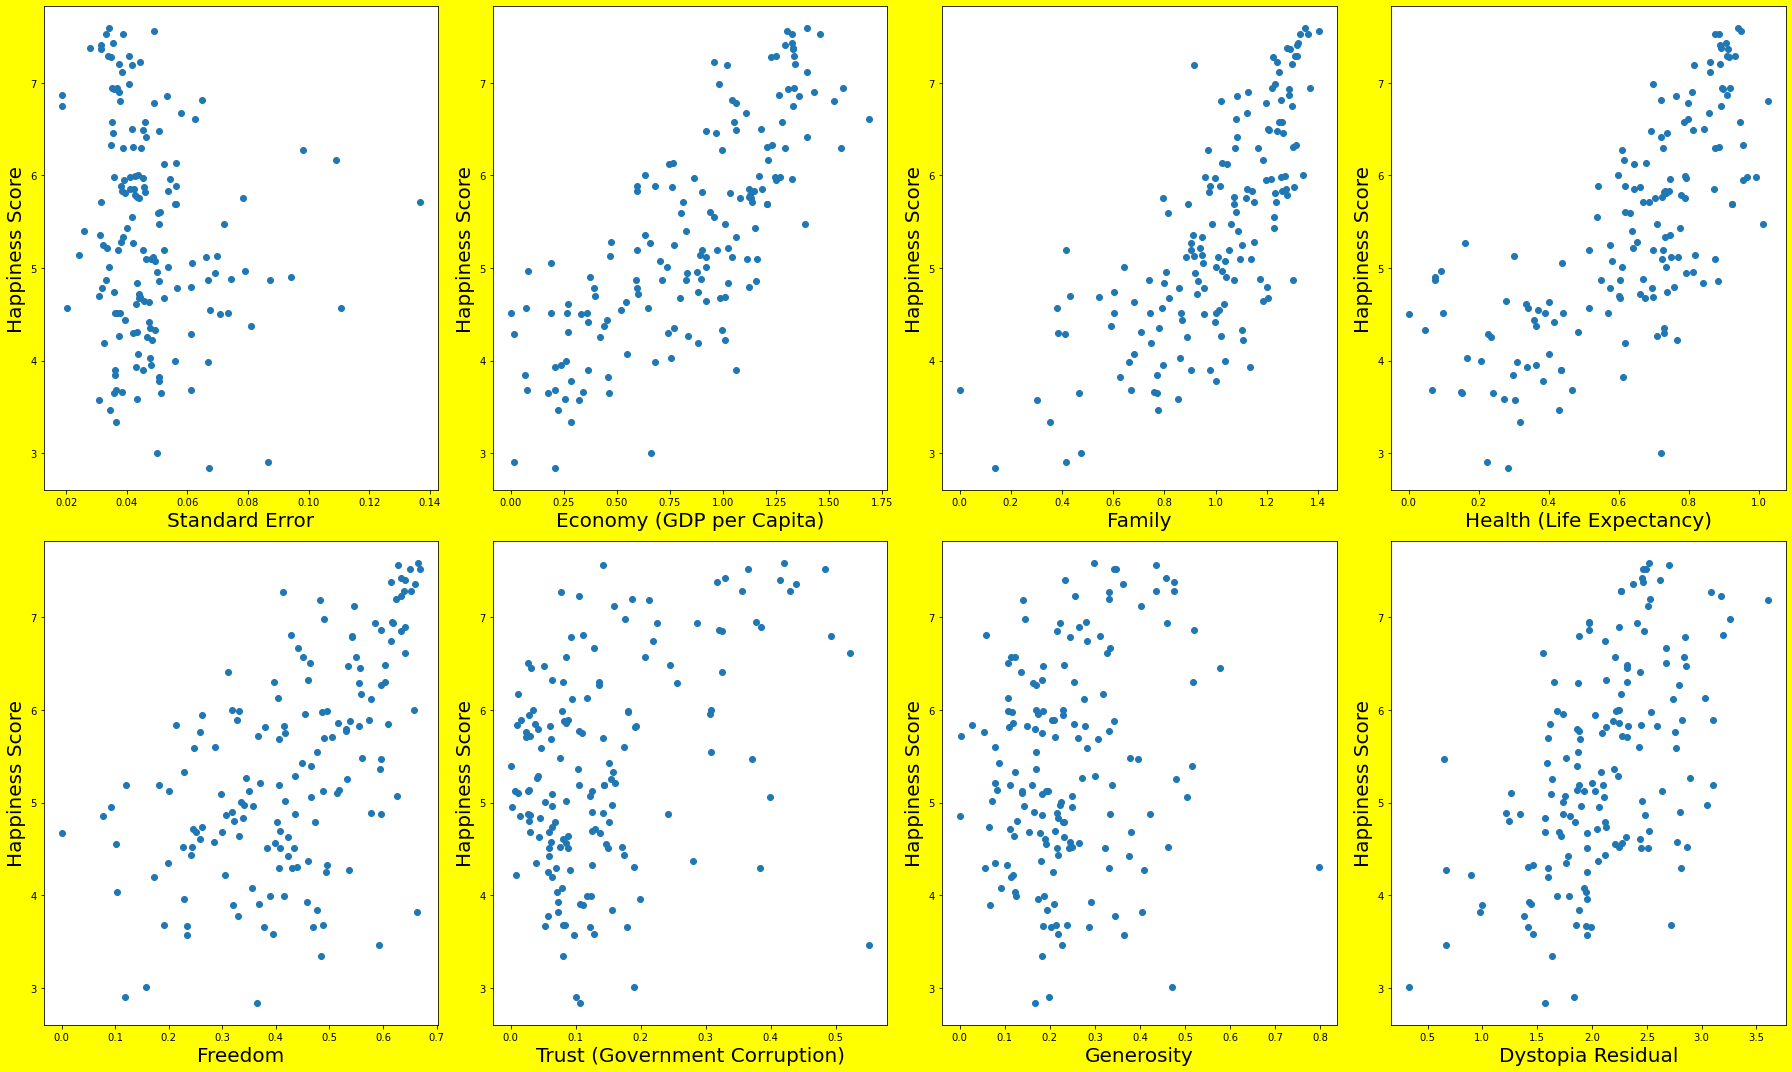

In [100]:
plt.figure(figsize=(25,15),facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h4><font color='maroon'> On observation of the plot, all selected columns seem to have an impact on the Happiness Score

<h2><u><font color='green'>NEXT - Step11:</font></u> Standardistaion of Feature Data</h2><br><h4>An important step in ensuring a successful model.

In [71]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [72]:
x_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

<h2><u><font color='green'>NEXT - Step12:</font></u> Splitting Data for Training and testing</h2><br><h4>An important step in ensuring a successful model.<br>Higher test_sizes give a better approximation.

In [73]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25, random_state=4999899)
y_train.head()

145    3.781
28     6.575
42     6.123
65     5.695
146    3.681
Name: Happiness Score, dtype: float64

<h2><u><font color='green'>NEXT - Step13:</font></u> Model Instantiating and Training of Data</h2><br><h4>We are using Linear regression for the computation, as the problem statement satisfies all of its conditions.

In [74]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [75]:
x.head(5)#--- for ref

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [76]:
ndf.head(3)#--for ref

,Country,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527


<h3>Initial Prediction

In [78]:
print('Happiness index could be:', regression.predict(scaler.transform([[0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204]]))) #------ #383 data

Happiness index could be: [7.52697351]


<h2><u><font color='green'>NEXT - Step14:</font></u> Pickles</h2><br><h4>Pickling up the Process for later use.(Saving) 
  

In [79]:
#pickle
pickle.dump(regression, open('happiness_model', 'wb'))

In [81]:
#open

loaded_model=pickle.load(open('happiness_model','rb'))
a= loaded_model.predict(scaler.transform([[0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738]])) #-----#1 data
a

array([7.58685353])

<h2><u><font color='green'>NEXT - Step15:</font></u> Checking the percentage of Accuracy of model</h2><br><h4>An important step in determining the success rate of the model

In [82]:
regression.score(x_train,y_train) 

0.9999999438555456

In [83]:
regression.score(x_test,y_test)

0.9999999301458814

<h4><font color='maroon'>The success rate is about 99%, as seen above

In [84]:
#plot and visualise


y_pred=regression.predict(x_test)
#y_pred

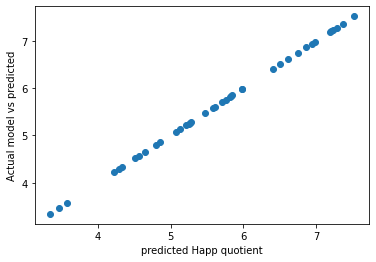

In [85]:
plt.scatter(y_test,y_pred)
plt.xlabel('predicted Happ quotient')
plt.ylabel('Actual model vs predicted')
plt.show()

In [86]:
#model evaluation and error percentage

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred=regression.predict(x_test)


In [87]:
mean_absolute_error(y_test,y_pred)

0.0002500756986720365

In [88]:
mean_squared_error(y_test, y_pred)

8.937860459750648e-08

In [89]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0002989625471484789

<h2><u><font color='green'>NEXT - Step16:</font></u> Regularisation:</h2><br><h4>Note: if we include Dystopia residual(like now) the success rate is 99% and - about 68% when it is excluded.<br>I tried working the model by droping different columns, but the success of prediction fell drastically.</h4>
<h3>Checking the accuracy of the prediction by determining the overfitting by comparing with Lasso regression model
    

In [90]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [91]:
#lassoCv will return best alpha after max iteration
#normalising means subtracting the mean and dividing by the l2 norm

lassocv = LassoCV(alphas=None, max_iter =100, normalize = True )
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [92]:
alpha=lassocv.alpha_
alpha

8.28332965963673e-05

In [93]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.28332965963673e-05)

In [94]:
lasso_reg.score(x_test,y_test)

0.9999998955811465

<h3 align="center"><font color='maroon'><u> It is found that the lasso score is the same 99.9 percent, as predicted earlier.<br>It means to say the built model is true and is mostly accurate.
    <br>Not predicting using any other methods as the accuracy is already 99% and dataset is very small.